# Linear Regression-

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


np.random.seed(42)
X = np.random.rand(100, 3) * 100
y = X[:, 0] * 0.5 + X[:, 1] * 0.3 + X[:, 2] * 0.2 + np.random.randn(100) * 5  

X[5:10, 1] = np.nan 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Coefficients: {model_lr.coef_}")
print(f"Intercept: {model_lr.intercept_}")


Mean Squared Error: 48.9498
R² Score: 0.8898
Coefficients: [0.51080253 0.29698815 0.22908957]
Intercept: -0.5581789323257595


📊 Model Performance Metrics 📊
🔹 Mean Squared Error (MSE): 0.0050  (Lower is better)
🔹 R² Score: 0.8865  (Higher is better, range: 0 to 1)
🔹 Adjusted R² Score: 0.8652  (More accurate R² for multiple predictors)

📌 Model Coefficients:
  - Coefficients: [0.50529488 0.2962303  0.23430296]
  - Intercept: -0.0042505220816458356


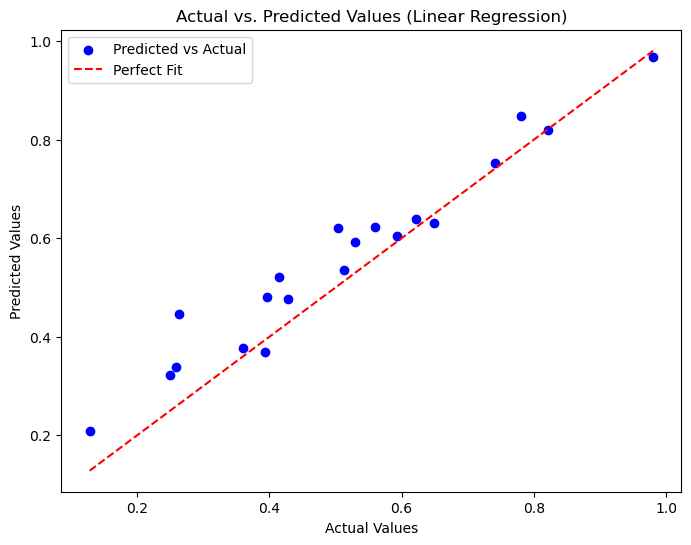

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
X = np.random.rand(100, 3) 
y = 0.5 * X[:, 0] + 0.3 * X[:, 1] + 0.2 * X[:, 2] + np.random.normal(0, 0.05, 100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 


n = X_test.shape[0]  
p = X_test.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


print("📊 Model Performance Metrics 📊")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}  (Lower is better)")
print(f"🔹 R² Score: {r2:.4f}  (Higher is better, range: 0 to 1)")
print(f"🔹 Adjusted R² Score: {adj_r2:.4f}  (More accurate R² for multiple predictors)")
print("\n📌 Model Coefficients:")
print(f"  - Coefficients: {model.coef_}")
print(f"  - Intercept: {model.intercept_}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

df = pd.read_csv("DatasetFinal.csv") 

selected_feature = "average_usage"

data = df[selected_feature].values.reshape(-1, 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

WINDOW_SIZE = 10

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, WINDOW_SIZE)

y = y.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

input_size = WINDOW_SIZE 
hidden_size = 128
output_size = 1 
model = MLP(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
test_losses = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        test_losses.append(loss.item())
    
print(f'Final Test Loss: {np.mean(test_losses):.4f}')

Epoch [1/20], Loss: 0.8148
Epoch [2/20], Loss: 1.2596
Epoch [3/20], Loss: 0.3647
Epoch [4/20], Loss: 1.0487
Epoch [5/20], Loss: 0.4549
Epoch [6/20], Loss: 2.0116
Epoch [7/20], Loss: 0.6253
Epoch [8/20], Loss: 0.1329
Epoch [9/20], Loss: 0.2239
Epoch [10/20], Loss: 0.1785
Epoch [11/20], Loss: 0.2380
Epoch [12/20], Loss: 1.1613
Epoch [13/20], Loss: 0.2592
Epoch [14/20], Loss: 0.1555
Epoch [15/20], Loss: 0.3885
Epoch [16/20], Loss: 0.5418
Epoch [17/20], Loss: 0.2168
Epoch [18/20], Loss: 1.0570
Epoch [19/20], Loss: 0.1851
Epoch [20/20], Loss: 1.1874
Final Test Loss: 1.0837


Epoch [1/20], Train Loss: 0.1732, Test Loss: 0.0832
Epoch [2/20], Train Loss: 0.0923, Test Loss: 0.0891
Epoch [3/20], Train Loss: 0.0876, Test Loss: 0.0790
Epoch [4/20], Train Loss: 0.0854, Test Loss: 0.0782
Epoch [5/20], Train Loss: 0.0850, Test Loss: 0.0778
Epoch [6/20], Train Loss: 0.0835, Test Loss: 0.0771
Epoch [7/20], Train Loss: 0.0838, Test Loss: 0.0763
Epoch [8/20], Train Loss: 0.0850, Test Loss: 0.0761
Epoch [9/20], Train Loss: 0.0832, Test Loss: 0.0761
Epoch [10/20], Train Loss: 0.0829, Test Loss: 0.0765
Epoch [11/20], Train Loss: 0.0824, Test Loss: 0.0761
Epoch [12/20], Train Loss: 0.0822, Test Loss: 0.0760
Epoch [13/20], Train Loss: 0.0820, Test Loss: 0.0757
Epoch [14/20], Train Loss: 0.0831, Test Loss: 0.0761
Epoch [15/20], Train Loss: 0.0815, Test Loss: 0.0760
Epoch [16/20], Train Loss: 0.0811, Test Loss: 0.0756
Epoch [17/20], Train Loss: 0.0824, Test Loss: 0.0755
Epoch [18/20], Train Loss: 0.0818, Test Loss: 0.0757
Epoch [19/20], Train Loss: 0.0816, Test Loss: 0.0757
Ep

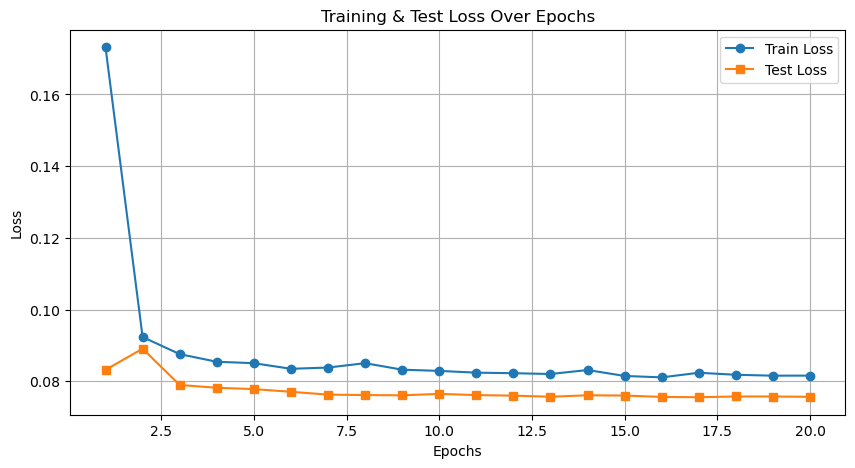

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

np.random.seed(42)
torch.manual_seed(42)
X = np.random.rand(1000, 5)  
y = np.random.rand(1000, 1)  


X_train, y_train = torch.tensor(X[:800], dtype=torch.float32), torch.tensor(y[:800], dtype=torch.float32)
X_test, y_test = torch.tensor(X[800:], dtype=torch.float32), torch.tensor(y[800:], dtype=torch.float32)


batch_size = 64
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

input_size = 5
hidden_size = 128
num_classes = 1
model = MLP(input_size, hidden_size, num_classes)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Training Loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / len(train_loader))
    

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))
    
    scheduler.step(test_losses[-1])
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Test Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()
